In [1]:
import matplotlib.pyplot as plt
import numpy as np

from karabo_data import RunDirectory, stack_detector_data
from extra_geom import AGIPD_1MGeometry
import xarray as xr

In [2]:
import extra_data as ex
from iminuit import Minuit
from iminuit.cost import LeastSquares
import h5netcdf

In [3]:
#loc = '/gpfs/exfel/exp/MID/202430/p{}/scratch/xpcs/r0'.format(proposal)

run = RunDirectory('/gpfs/exfel/exp/MID/202430/p900401/proc/r0422/') # photonise - 9 else its adu value 

In [4]:
tid, train_data = run.select('*/DET/*', 'image.data').train_from_index(1000)

In [5]:
proposal = 900401

def get_data(run_no):
    
    qROI = range(14)

    loc = '/gpfs/exfel/exp/MID/202430/p{}/scratch/xpcs/r0'.format(proposal)
    outputloc = loc+str(run_no)+'/'

    TTCF = xr.open_dataarray(outputloc+'TTCF.nc')
    SAXS = xr.open_dataarray(outputloc+'SAXS.nc')
    g2 = xr.open_dataarray(outputloc+'g2.nc')
    pulseN = TTCF.pulse_1.values
    dt = pulseN[:-1]*222.5e-9 * 2
    q = np.array(TTCF.qBin[qROI])
    
    return TTCF, SAXS, g2, pulseN, dt, q

t134 = 422 #silica 20nm T = 1.3e-4
TTCF_134s, SAXS_134s, g2_134s, pulseN_134s, dt_134s, q_134s = get_data(t134)

In [6]:
stacked = stack_detector_data(train_data, 'image.data')
stacked_pulse = stacked[99]
stacked_pulse.shape

(16, 512, 128)

In [7]:
#train_data
list(train_data.keys())

['MID_DET_AGIPD1M-1/DET/6CH0:xtdf',
 'MID_DET_AGIPD1M-1/DET/11CH0:xtdf',
 'MID_DET_AGIPD1M-1/DET/13CH0:xtdf',
 'MID_DET_AGIPD1M-1/DET/12CH0:xtdf',
 'MID_DET_AGIPD1M-1/DET/10CH0:xtdf',
 'MID_DET_AGIPD1M-1/DET/14CH0:xtdf',
 'MID_DET_AGIPD1M-1/DET/3CH0:xtdf',
 'MID_DET_AGIPD1M-1/DET/5CH0:xtdf',
 'MID_DET_AGIPD1M-1/DET/9CH0:xtdf',
 'MID_DET_AGIPD1M-1/DET/8CH0:xtdf',
 'MID_DET_AGIPD1M-1/DET/0CH0:xtdf',
 'MID_DET_AGIPD1M-1/DET/4CH0:xtdf',
 'MID_DET_AGIPD1M-1/DET/2CH0:xtdf',
 'MID_DET_AGIPD1M-1/DET/1CH0:xtdf',
 'MID_DET_AGIPD1M-1/DET/15CH0:xtdf',
 'MID_DET_AGIPD1M-1/DET/7CH0:xtdf']

In [8]:
np.unique(train_data['MID_DET_AGIPD1M-1/DET/15CH0:xtdf']['image.data'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 22, 25], dtype=int16)

In [9]:
stacked_pulse.shape

(16, 512, 128)

In [10]:
geom = AGIPD_1MGeometry.from_quad_positions(quad_pos=[
        (-525,635), #(-525, 625),
        (-570, -10), #(-550, -10),
        (520, -160),
        (542.5, 475),
    ])

<Axes: title={'center': 'AGIPD-1M detector geometry (No file)'}, xlabel='metres', ylabel='metres'>

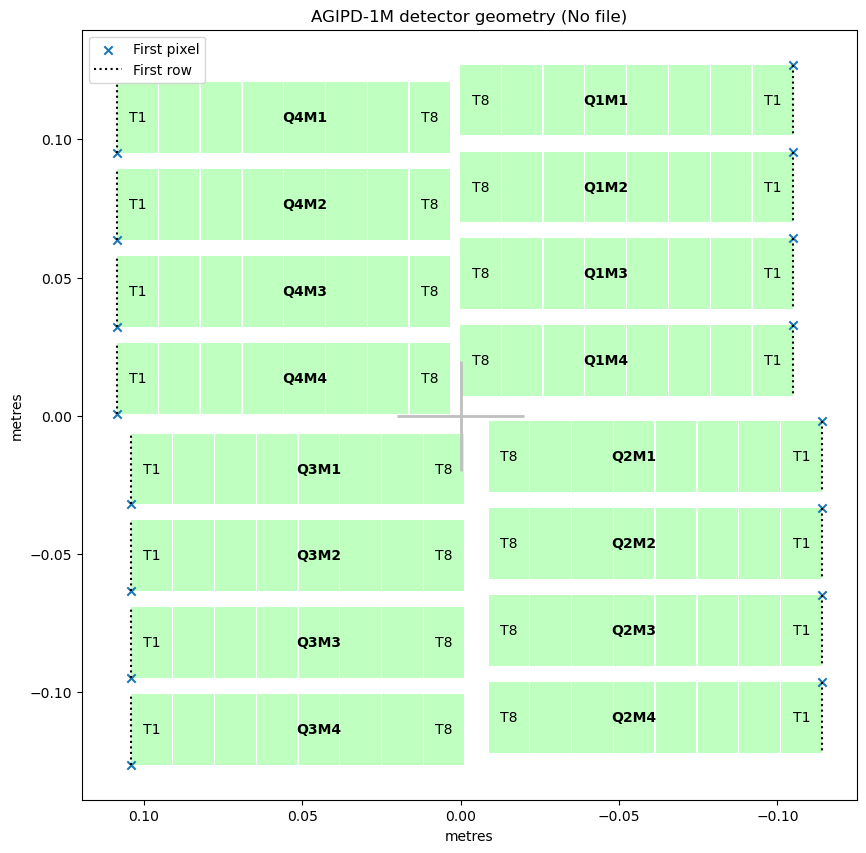

In [11]:
geom.inspect(axis_units = 'm')

In [12]:
%%time
data, centre_yx = geom.position_modules_interpolate(stacked_pulse)
print(data.shape)

(1268, 1114)
CPU times: user 2.53 s, sys: 98.5 ms, total: 2.63 s
Wall time: 3.37 s


In [13]:
%%time
data, centre_yx = geom.position_modules_fast(stacked_pulse)
print(data.shape)

(1266, 1112)
CPU times: user 9.37 ms, sys: 1.38 ms, total: 10.8 ms
Wall time: 8.9 ms


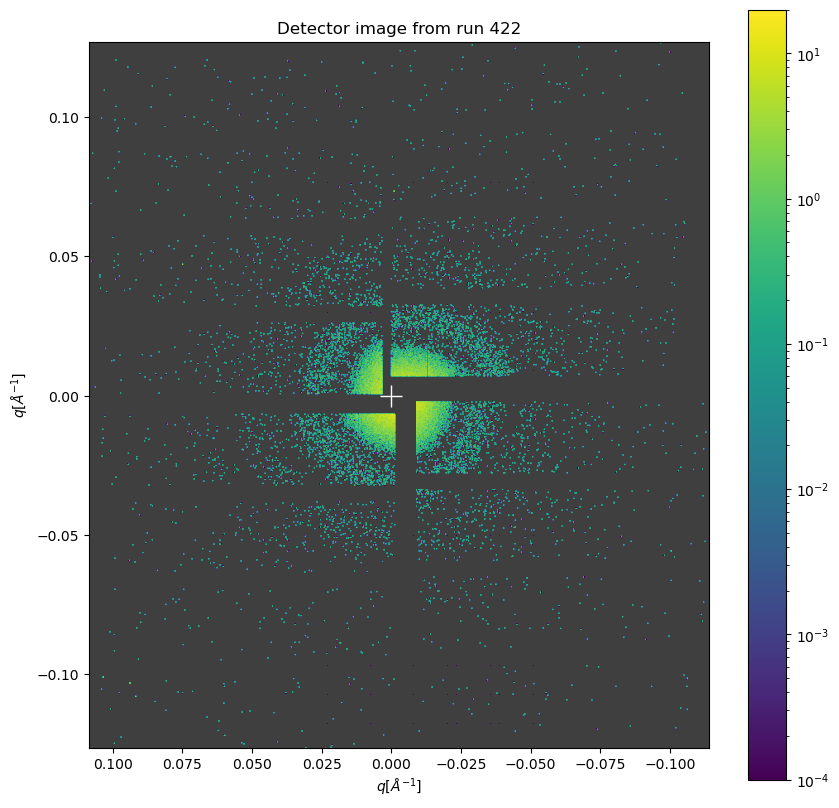

In [70]:
import matplotlib as mpl
geom.plot_data_fast(stacked_pulse, norm= 'log', vmin=0.0001, axis_units = 'm')
plt.xlabel(r'$q [Å^{-1}]$')
plt.ylabel(r'$q [Å^{-1}]$')
plt.title('Detector image from run 422')
#plt.xlim(-0.07,0.07)
#plt.ylim(0.07, -0.07)
plt.savefig('Sim/pics/det_im_422_1.png', dpi = 300)



In [15]:
qq = SAXS_134s.coords['q'].values

q_extent = [qq.max(), -qq.max(), -qq.max(), qq.max()]

In [16]:
q_extent

[0.12541629268995233,
 -0.12541629268995233,
 -0.12541629268995233,
 0.12541629268995233]

In [17]:
-qq.max()

-0.12541629268995233

Text(0.5, 1.0, 'Detector image of Silica')

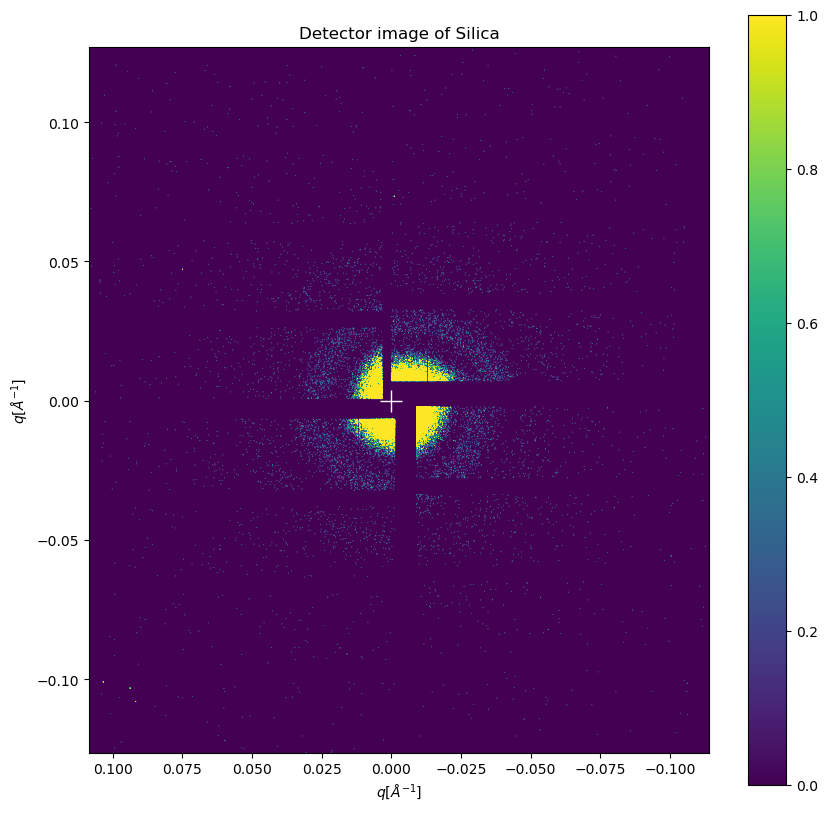

In [18]:
geom.plot_data((stacked_pulse), vmin = 0, vmax = 1, axis_units = 'm')
plt.xlabel(r'$q [Å^{-1}]$')
plt.ylabel(r'$q [Å^{-1}]$')
plt.title('Detector image of Silica')
#plt.savefig('Sim/pics/silica_det_99.png', dpi = 300)


In [19]:
stacked_pulse.shape

(16, 512, 128)

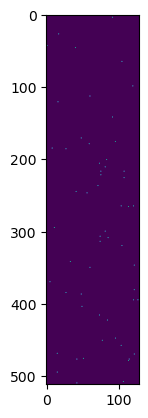

In [20]:
plt.imshow(stacked_pulse[0])

## XGM

In [21]:
#('/gpfs/exfel/exp/MID/202430/p900401/proc/r0422/')

sa2_data = RunDirectory('/gpfs/exfel/exp/MID/202430/p900401/raw/r0425')
sa2_422 = RunDirectory('/gpfs/exfel/exp/MID/202430/p900401/raw/r0422')
sa2_data.info();

# of trains:    2694
Duration:       0:04:29.300000
First train ID: 2036256095
Last train ID:  2036258788

16 detector modules (MID_DET_AGIPD1M-1)
  e.g. module MID_DET_AGIPD1M-1 0 : 512 x 128 pixels
  MID_DET_AGIPD1M-1/DET/0CH0:xtdf
  352 frames per train, up to 948288 frames total

5 instrument sources (excluding detectors):
  - MID_EXP_AGIPD1M1/REDU/LITFRM:output
  - MID_RR_SYS/MDL/KARABACON:output
  - MID_RR_UTC/TSYS/TIMESERVER:outputBunchPattern
  - MID_XTD6_IMGPI/CAM/BEAMVIEW:daqOutput
  - SA2_XTD1_XGM/XGM/DOOCS:output

47 control sources:
  - MID_AUXT1/MDL/DATA_SELECTOR
  - MID_AUXT2/MDL/DATA_SELECTOR
  - MID_AUXT2_ATT/MDL/ATT
  - MID_DET_AGIPD1M/CC/MON_0
  - MID_EXP_AGIPD1M/GAUGE/PG1
  - MID_EXP_AGIPD1M/PSC/HV
  - MID_EXP_AGIPD1M/TSENS/H1_T_EXTHOUS
  - MID_EXP_AGIPD1M/TSENS/H2_T_EXTHOUS
  - MID_EXP_AGIPD1M/TSENS/Q1_T_BLOCK
  - MID_EXP_AGIPD1M/TSENS/Q2_T_BLOCK
  - MID_EXP_AGIPD1M/TSENS/Q3_T_BLOCK
  - MID_EXP_AGIPD1M/TSENS/Q4_T_BLOCK
  - MID_EXP_AGIPD1M1/CTRL/MC1
  - MID_EXP_AGIP

In [22]:
sa2_data.keys_for_source('SA2_XTD1_XGM/XGM/DOOCS:output')

{'data.intensityAUXTD',
 'data.intensitySigmaTD',
 'data.intensityTD',
 'data.trainId',
 'data.xSigmaTD',
 'data.xTD',
 'data.ySigmaTD',
 'data.yTD'}

In [23]:
sa2_flux = sa2_data.get_array('SA2_XTD1_XGM/XGM/DOOCS:output', 'data.intensityTD')
flux_422 = sa2_422.get_array('SA2_XTD1_XGM/XGM/DOOCS:output', 'data.intensityTD')

print(np.mean(sa2_flux[0][0:100]))

<xarray.DataArray ()>
array(763.99835, dtype=float32)
Coordinates:
    trainId  uint64 2036256095


In [24]:
(sa2_flux[0]) #micro jule ca 10e12 photons

<xarray.DataArray (dim_0: 1000)>
array([553.3813 , 584.1039 , 679.6018 , 577.9125 , 520.1884 , 687.9195 ,
       716.20306, 622.20605, 672.7693 , 758.58923, 779.08655, 759.1365 ,
       646.5496 , 753.00757, 751.2252 , 736.49713, 707.88525, 754.22705,
       735.0587 , 822.4109 , 768.51733, 724.6459 , 781.41614, 716.1561 ,
       585.2765 , 600.3485 , 723.98926, 760.12146, 799.1461 , 759.1365 ,
       798.9585 , 800.7565 , 767.29785, 724.8491 , 804.8998 , 840.92255,
       683.917  , 857.777  , 821.5665 , 819.06494, 822.45776, 750.7717 ,
       725.84973, 787.5919 , 810.98175, 772.3479 , 809.96545, 869.9409 ,
       724.1612 , 854.80634, 822.84863, 781.1504 , 721.72217, 699.00464,
       832.98004, 871.70764, 892.3926 , 826.17883, 844.09644, 761.2315 ,
       854.4468 , 800.19366, 850.91327, 759.10516, 851.86694, 796.926  ,
       734.60535, 702.0222 , 754.74304, 818.2051 , 777.3511 , 770.2372 ,
       816.56335, 833.324  , 787.2479 , 815.7973 , 781.0878 , 740.484  ,
       790.031  , 803.19556, 860.51306, 766.0002 , 874.88153, 779.89954,
       769.58057, 767.93884, 674.1295 , 767.7669 , 780.43115, 772.645  ,
       734.49585, 840.7036 , 794.1899 , 814.67163, 808.1049 , 753.1483 ,
       789.859  , 787.62317, 749.5679 , 736.41895,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
...
         1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.     ], dtype=float32)
Coordinates:
    trainId  uint64 2036256095
Dimensions without coordinates: dim_0

In [25]:
count = []
for i in range(len(sa2_flux)):
    avg_photons = np.mean(sa2_flux[i][0:100])
    count.append(avg_photons)
count_422 = []
for i in range(len(flux_422)):
    avg = np.mean(flux_422[i][0:100])
    count_422.append(avg)


In [26]:
photons = np.array(sa2_flux[:, :100]).reshape(-1)
photons422 = np.array(flux_422[:, :100]).reshape(-1)

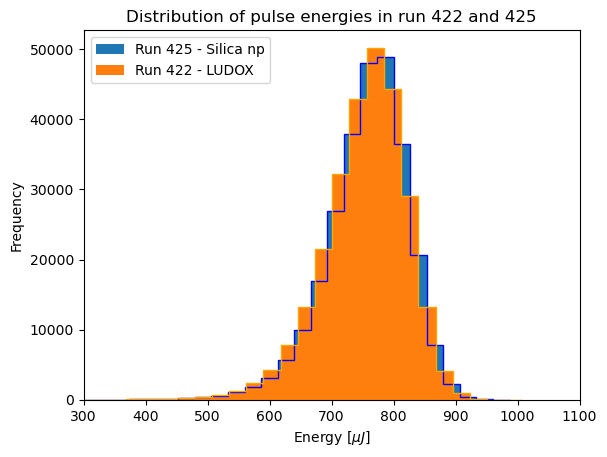

In [60]:
plt.hist(photons422, histtype = 'stepfilled', bins = 30, label = 'Run 425 - Silica np');
plt.hist(photons, histtype = 'stepfilled', bins = 30, label = 'Run 422 - LUDOX')
plt.hist(photons422, histtype = 'step', bins = 30, color = 'b');
plt.hist(photons, histtype = 'step', bins = 30, color = 'orange')
plt.xlim(300,1100)
plt.xlabel(r'Energy [$\mu J$]')
plt.ylabel('Frequency')
plt.title('Distribution of pulse energies in run 422 and 425')
plt.legend()
plt.savefig('Sim/pics/pulse_hist.png', dpi = 300)

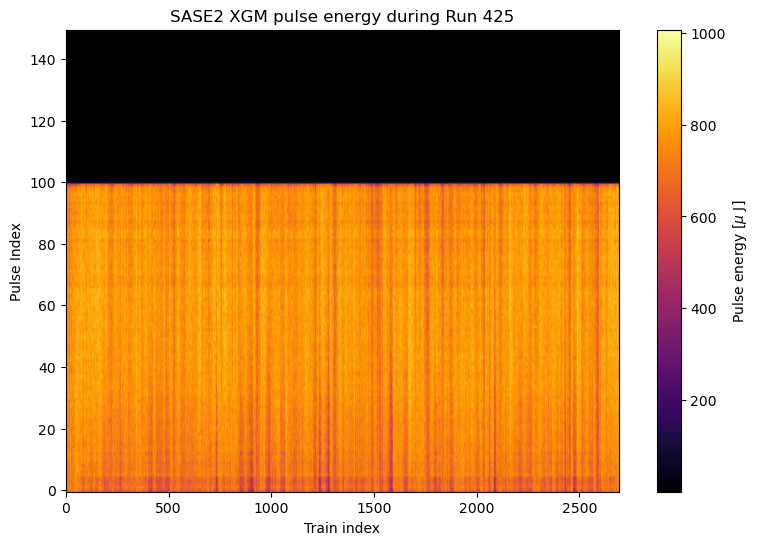

In [67]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
image = ax.imshow(sa2_flux[:, :150].transpose(), origin='lower', cmap='inferno')
ax.set_title('SASE2 XGM pulse energy during Run 425')
fig.colorbar(image, orientation='vertical', label = r'Pulse energy [$\mu$ J]')
ax.set_xlabel('Train index')
ax.set_ylabel('Pulse Index')
ax.set_aspect(15)
#cbar = plt.colorbar()
#cbar.set_label(r'Pulse energy [$\mu$ J]')
plt.savefig('Sim/pics/xgm_425.png', dpi = 300)

In [29]:
(np.mean(sa2_flux[:,:100], axis=1))

<xarray.DataArray (trainId: 2692)>
array([763.99835, 755.2756 , 730.4441 , ..., 803.7816 , 792.3912 ,
       807.4607 ], dtype=float32)
Coordinates:
  * trainId  (trainId) uint64 2036256095 2036256096 ... 2036258785 2036258786

In [30]:
sa2_mean_on = np.mean(sa2_flux[:, :100:2], axis=1)
sa2_stddev_on = np.std(sa2_flux[:, :100:2], axis=1)
print(sa2_mean_on)

<xarray.DataArray (trainId: 2692)>
array([762.7799 , 756.8697 , 721.90466, ..., 811.67993, 793.253  ,
       806.4879 ], dtype=float32)
Coordinates:
  * trainId  (trainId) uint64 2036256095 2036256096 ... 2036258785 2036258786


In [31]:
sa2_mean_off = np.mean(sa2_flux[:, 1:101:2], axis=1)
sa2_stddev_off = np.std(sa2_flux[:, 1:101:2], axis=1)
print(sa2_mean_off)

<xarray.DataArray (trainId: 2692)>
array([765.2165 , 753.68115, 738.98334, ..., 795.8832 , 791.52954,
       808.4334 ], dtype=float32)
Coordinates:
  * trainId  (trainId) uint64 2036256095 2036256096 ... 2036258785 2036258786


Text(0, 0.5, 'suppression')

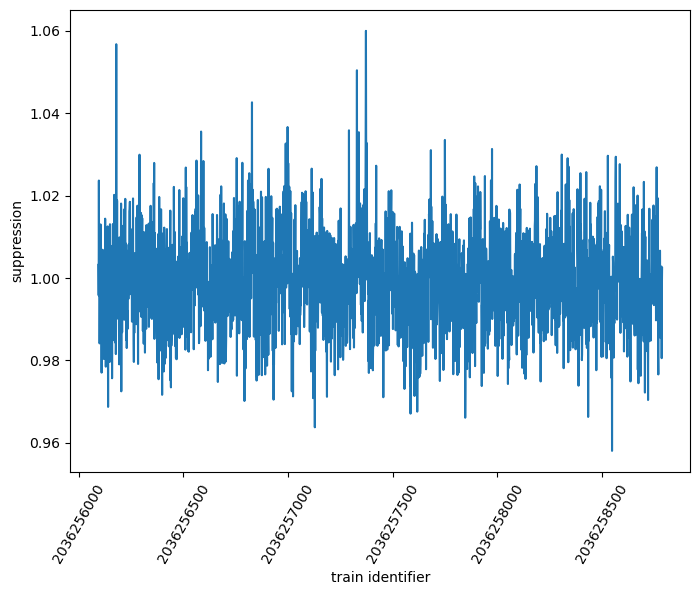

In [32]:
sa2_suppression = sa2_mean_off / sa2_mean_on
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(sa2_suppression.coords['trainId'].values, sa2_suppression)
ax.set_xlabel('train identifier')
ax.ticklabel_format(style='plain', useOffset=False)
plt.xticks(rotation=60)
ax.set_ylabel('suppression')

In [33]:
sa2_rel_error = np.sqrt(np.square(sa2_stddev_off / sa2_mean_off) + np.square(sa2_stddev_on / sa2_mean_on))
sa2_abs_error = sa2_rel_error * sa2_suppression

Text(0, 0.5, 'suppression')

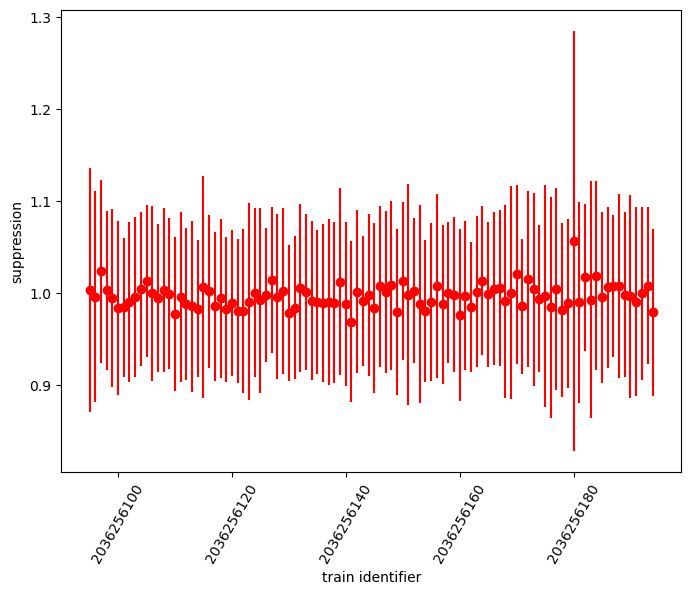

In [34]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.errorbar(sa2_suppression.coords['trainId'].values[:100], sa2_suppression[:100], yerr=sa2_abs_error[:100], fmt='ro')
ax.set_xlabel('train identifier')
ax.ticklabel_format(style='plain', useOffset=False)
plt.xticks(rotation=60)
ax.set_ylabel('suppression')

Text(0, 0.5, 'frequency')

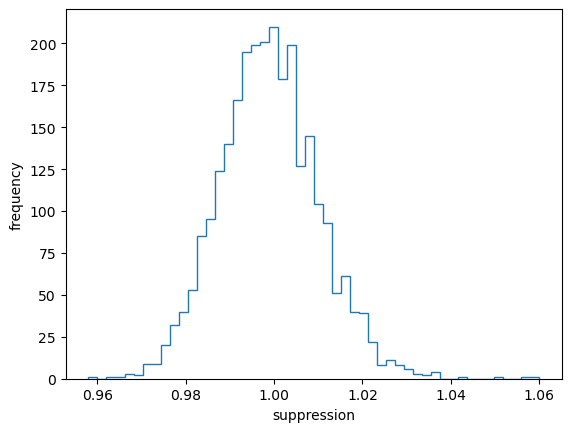

In [35]:
plt.hist(sa2_suppression, bins=50, histtype = 'step');
plt.xlabel('suppression')
plt.ylabel('frequency')

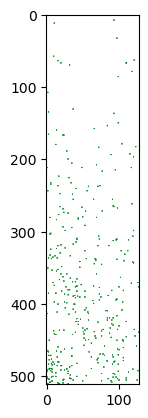

In [36]:
plt.imshow(stacked_pulse[5], norm= 'log', vmin=0.001, cmap = 'Greens')

In [48]:
np.mean(photons422)

756.39404

In [68]:
np.mean(photons)

752.812